# PDI - Trabalho 2

- Data: 09/2020
- Nome: Bruna Medeiros da Silva
- Matrícula: 16/0048711

- Professor: Renan Utida
- Matéria: Processamento Digital de Imagens

## Imports

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

## Import data

(-0.5, 888.5, 888.5, -0.5)

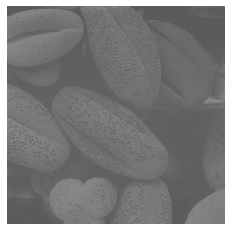

In [3]:
img = cv2.imread("Fig0310(b)(washed_out_pollen_image).tif")
plt.imshow(img)
plt.axis('off')

## Questão 1

## 1.a - Original Image Histogram


In [33]:
def my_histogram(image, plot = True, amax = 256, norm = False):
    if(len(image.shape) > 2):
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Get number of lines and columns
    qntI, qntJ = image.shape
    
    # Creating Histogram manually
    histogram = np.zeros(amax)
    color = 0
    for i in range(qntI):
        for j in range(qntJ):
            color = image[i][j]
            # print(color)
            histogram[color] += 1
            
    if(norm):
        histogram = (histogram - np.amin(histogram)) /  (np.amax(histogram) - np.amin(histogram))
    
    if(plot):
        plt.figure()
        plt.stem(histogram, use_line_collection = True)
        plt.title('Original Image Histogram $p_r(r)$')
        plt.savefig('hist_original_fig')
        plt.show()
    return histogram

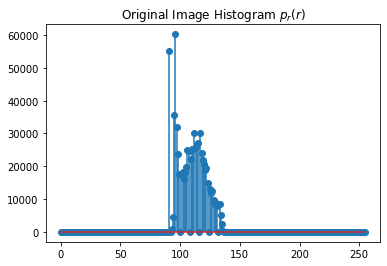

In [34]:
 
img = cv2.imread("Fig0310(b)(washed_out_pollen_image).tif")
hist = my_histogram(img)


### Comparing with the OpenCV version

<Figure size 432x288 with 0 Axes>

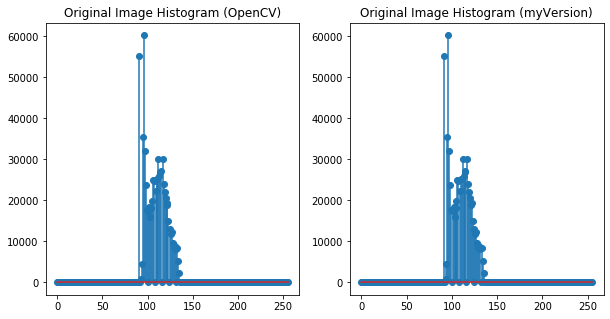

In [6]:
img = cv2.imread("Fig0310(b)(washed_out_pollen_image).tif")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
histogram = cv2.calcHist([img], [0], None, [256], [0, 255])
plt.figure()
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
axs[0].stem(histogram, use_line_collection = True)
axs[1].stem(hist, use_line_collection = True)
axs[0].title.set_text('Original Image Histogram (OpenCV)')
axs[1].title.set_text('Original Image Histogram (myVersion)')
plt.show()

## Questão 1.b - Cumulative Distribution Function (CDF, $G_z$)


### Using the histogram to define the CDF

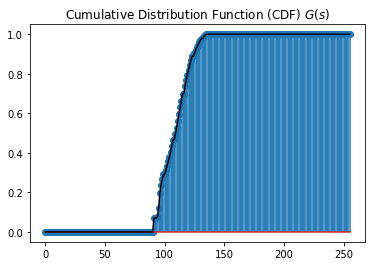

In [7]:
def cdf_2D(img, plot = True, amax = 256, norm = False):
    cdf = np.zeros(amax)
    # sdf = np.zeros(amax)
    if(len(img.shape) > 2):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Get number of lines and columns
    qntI, qntJ = img.shape
    # Number of pixels
    qnt_pixels = qntI * qntJ
   
    histogram = my_histogram(img, amax = amax, norm = norm, plot = False)
    # print(len(histogram))
    for h in range(amax):
        cdf[h] = np.sum(histogram[0: h + 1]) / qnt_pixels 
        # sdf[h] = histogram[h] / qnt_pixels 
        
    
    if(plot):
        plt.figure()
        plt.stem(cdf, use_line_collection = True)
        plt.plot(cdf, 'k')
        plt.title('Cumulative Distribution Function (CDF) $G(s)$')
        plt.show()
    return cdf
   
img = cv2.imread("Fig0310(b)(washed_out_pollen_image).tif")
cdf = cdf_2D(img)

### Using the given PDF to generate the desired CDF


In [8]:
  def cdf_pdf(pdf, plot = True):
    cdf = np.zeros(len(pdf))
    for h in range(len(pdf)):
        cdf[h] = np.sum(pdf[0: h + 1])
    if(plot):
        plt.figure()
        plt.stem(pdf, use_line_collection=ne_collection = True)
        plt.title('Probability Distribuition function (PDF) $p_z(z)$')
        plt.show()

        plt.figure()
        plt.stem(cdf, use_line_collection = True)
        plt.plot(cdf, 'k')
        plt.title('Cumulative Distribution Function (CDF) $G(z)$')
        plt.show()
    return cdf

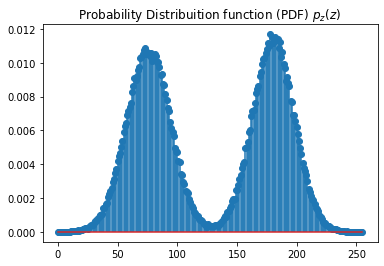

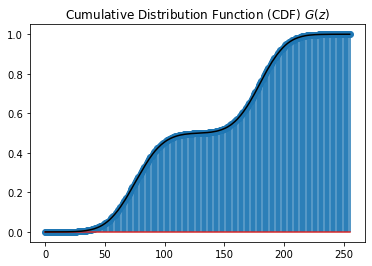

In [9]:
cdf = cdf_pdf(np.genfromtxt(fname='trabalho2.txt'))

In [2]:
def inv_cdf(img, required_pdf, amax = 256):
    if(len(img.shape) > 2):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x, y = img.shape
    new_img = img

    s = np.round(np.multiply((amax - 1), cdf_2D(img, plot = False)))
    G = np.round(np.multiply((amax - 1), cdf_pdf(required_pdf, plot = False)))

    # Example
    # original_pdf = [0.19, 0.25, 0.21, 0.16, 0.08, 0.06, 0.03, 0.02]
    # required_pdf = [0.0, 0.0, 0.0, 0.15, 0.20, 0.30, 0.20, 0.15]
    # amax = 8
    # s = np.round(np.multiply((amax - 1), cdf_pdf(original_pdf, plot = False)))
    # G = np.round(np.multiply((amax - 1), cdf_pdf(required_pdf, plot = False)))

    s = s.astype(np.uint8)
    new_z = np.zeros(amax)
    G_s = np.zeros(amax)
    diffs = []

    for k in range(amax):
        diffs = np.abs(np.subtract(G, s[k]))
        new_z[k] = np.argmin(diffs)
        G_s[s[k]] = np.argmin(diffs)

    plt.figure()
    plt.stem(G, linefmt = 'k', use_line_collection = True)
    plt.plot(s, '-or')
    plt.legend(['$s_k$', '$G(z_k)$'])
    plt.savefig('cdf_images')
    plt.show()

    plt.figure()
    markerline, stemlines, baseline = plt.stem(s, G_s[s], linefmt = 'k', markerfmt = '-oc', use_line_collection = True)
    plt.setp(baseline, color='k', linewidth=2)
    plt.setp(markerline, linewidth=3)
    plt.title('Mapping s in z')
    plt.xlabel('original values (s)')
    plt.ylabel('new values ($z = G^{-1}(s)$)')
    plt.savefig('transform_graph')
    plt.show()

    for i in range(x):
        for j in range(y):
            new_img[i][j] = new_z[img[i][j]]
    new_img = new_img.astype(np.uint8)
    return new_img

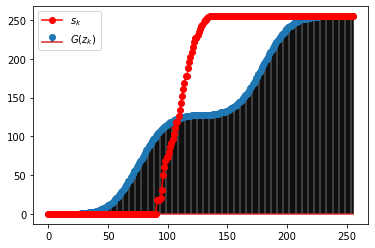

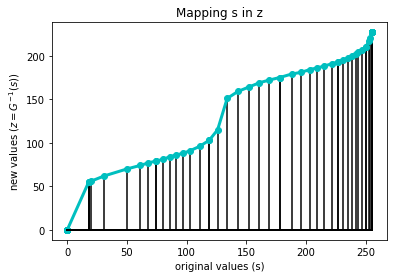

In [40]:
# new_z = [x for x in new_z if(x != 0)]
img = cv2.imread("Fig0310(b)(washed_out_pollen_image).tif")
new_img = inv_cdf(img, np.genfromtxt(fname='trabalho2.txt'))

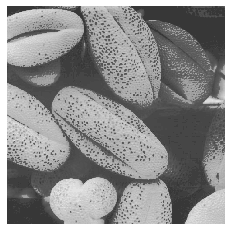

In [12]:
  plt.figure()
  plt.imshow(new_img, cmap = 'gray', vmin=0, vmax=255)
  plt.axis('off')
  plt.show()

## 1.d - Transformed Image Histogram


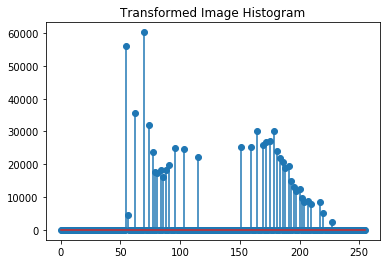

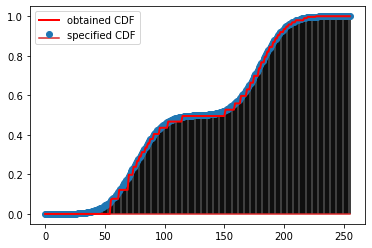

In [41]:
new_hist = my_histogram(new_img, plot = False)
plt.figure()
plt.stem(new_hist, use_line_collection = True)
plt.title('Transformed Image Histogram')
plt.savefig('transformed_hist')
plt.show()
new_cdf = cdf_2D(new_img, plot = False)



plt.figure()
plt.stem(cdf, use_line_collection = True, linefmt = 'k')
plt.plot(new_cdf, 'r', linewidth = 2)
plt.legend(['obtained CDF', 'specified CDF'])
plt.savefig('transformed_cdf')
plt.show()


<Figure size 432x288 with 0 Axes>

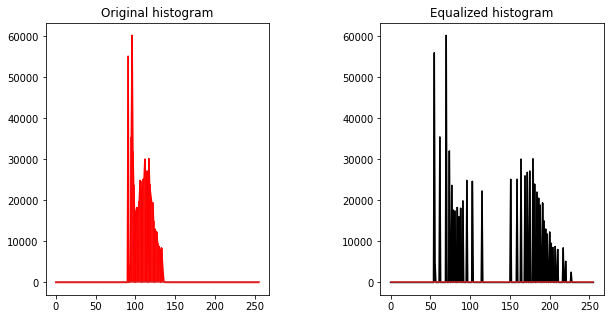

In [14]:
plt.figure()
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plt.subplots_adjust(wspace = 0.5)
ax[0].stem(my_histogram(img,  plot = False), linefmt = 'r', markerfmt= 'r', use_line_collection = True)
ax[1].stem(my_histogram(new_img,  plot = False), linefmt = 'k', markerfmt= 'k', use_line_collection = True)
ax[0].title.set_text('Original histogram')
ax[1].title.set_text('Equalized histogram')
plt.show()

<Figure size 432x288 with 0 Axes>

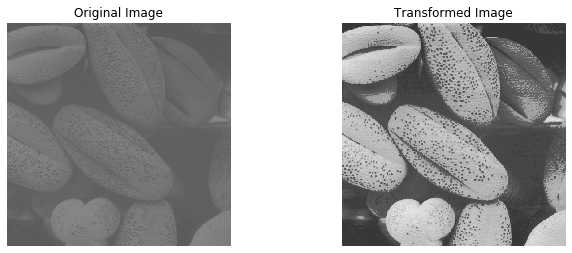

In [42]:
plt.figure()
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
plt.subplots_adjust(wspace = 0.5)
ax[0].imshow(img, vmin = 0, vmax = 255)
ax[1].imshow(new_img, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].title.set_text('Original Image')
ax[1].title.set_text('Transformed Image')
ax[0].axis('off')
ax[1].axis('off')
plt.savefig('images1')
plt.show()

# Questão 2




## 2.a - Algorithm to convert an image to uint8


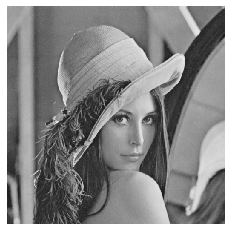

In [47]:
lena = cv2.imread('lena_gray_512.tif')
plt.figure()
plt.imshow(lena)
plt.axis('off')
plt.savefig('lena_rect_filter')
plt.show()

In [17]:
def rescale(xmax, xmin, ymax, ymin):
  a = (ymax - ymin) / (xmax - xmin)
  b = ((ymin * xmax) - (ymax * xmin)) / (xmax - xmin) 
  return a, b

def img2int(img):
  img_max = img.max()
  img_min = img.min()

  int_max = 255
  int_min = 0

  a, b = rescale(img_max, img_min, int_max, int_min)
  rescaled_img = np.multiply(a, img) + b
  return rescaled_img.astype(np.uint8)

In [18]:
x = np.linspace(0, 500, 300)
rescaled_x = img2int(x)

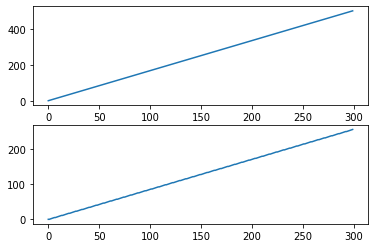

In [19]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(x)
ax[1].plot(rescaled_x)


## 2.b - Geometric average filter

In [20]:
def rect_avg_filter(img, rect = [5, 5]):
  if(len(img.shape) > 2):
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  row, col = img.shape

  new_img = img
  rectx = int(np.floor(rect[0] / 2))
  recty = int(np.floor(rect[1] / 2))

  for i in range(rectx, row - rectx):
    for j in range(recty, col - recty):
      filter = img[(i - rectx): (i + rectx + 1), (j - recty): (j + recty + 1)]
      avg = np.sum(np.asarray(filter)) / (rect[0] * rect[1])
      new_img[i][j] = avg

  return new_img


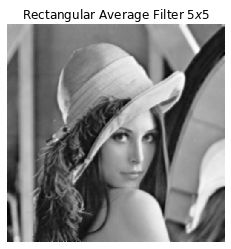

In [21]:
lena = cv2.imread('lena_gray_512.tif')
rect_avg_lena = rect_avg_filter(lena, rect = [5, 5])

plt.figure()
plt.imshow(rect_avg_lena, cmap = 'gray')
plt.axis('off')
plt.title('Rectangular Average Filter $5 x 5$')
plt.show()

## 2.c - Unsharp Masking

In [65]:
from skimage.filters import unsharp_mask

def unsharpe_masking(img, blurry_img, scaled = True, method = 'myMethod', plot = True, cut_out = False):
    if(len(img.shape) > 2):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    if(method is 'myMethod'):
        img = img.astype(np.float)
        blurry_img = blurry_img.astype(np.float)

        mask = np.subtract(img, blurry_img)
        new_img = np.array(mask) + np.array(img)

        if(cut_out):
            new_img[new_img < 0] = 0
            new_img[new_img > 255] = 255
        if(scaled):
            new_img = img2int(new_img)
        new_img = new_img.astype(np.uint8)
        if(plot):
            plt.figure()
            fig, axs = plt.subplots(1, 3, figsize = (10, 10))
            axs[0].imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
            axs[1].imshow(mask, cmap = 'gray')
            axs[2].imshow(new_img, cmap = 'gray', vmin = 0, vmax = 255)

            axs[0].axis('off')
            axs[1].axis('off')
            axs[2].axis('off')

            axs[0].title.set_text('Original')
            axs[1].title.set_text('Mask')
            axs[2].title.set_text('Filtered')
            
            plt.savefig('unsharp_mask')

    elif(method is 'skimage'):
        new_img = unsharp_mask(img, radius=1, amount=1) * 255

        new_img = new_img.astype(np.uint8)

        if(plot):
            plt.figure()
            fig, axs = plt.subplots(1, 2, figsize = (10, 10))
            axs[0].imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
            axs[1].imshow(new_img, cmap = 'gray', vmin = 0, vmax = 255)

            axs[0].axis('off')
            axs[1].axis('off')
    if(plot):
        plt.subplots_adjust(hspace = - 0.5)
        plt.show()
    return new_img
  

In [66]:
scaled_mask_lena = unsharpe_masking(lena, rect_avg_lena, plot = False)

## 2.d - High Boost Filter

In [61]:
def high_boost(img, blurry_img, k = [2, 5, 10], scaled = True, method = 'myMethod', plot = True, cut_out = False):
    if(len(img.shape) > 2):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    new_img = {}
    f = 0

    if(plot):
        n_figs = (2 * len(k))
        m = 2
        n = int(n_figs / m)
        plt.figure()
        fig, axs = plt.subplots(m, n, figsize = (10, 10))
        # axs[f].imshow(img, cmap = 'gray')

    if(method is 'myMethod'):
        img = img.astype(np.float)
        blurry_img = blurry_img.astype(np.float)
        for i in k:
            mask = np.multiply(np.subtract(img, blurry_img), i)
            new_img[f] = np.array(mask) + np.array(img)
            print(new_img[f].min(), ', ', new_img[f].max())
            if(cut_out):
                new_img[f][new_img[f] < 0] = 0
                new_img[f][new_img[f] > 255] = 255
            if(scaled):
                new_img[f] = img2int(new_img[f])
            new_img[f] = new_img[f].astype(np.uint8)

            if(plot):
                axs[0][f].imshow(mask, cmap = 'gray')
                axs[0][f].title.set_text('i = %d' % i)
                axs[1][f].imshow(new_img[f], cmap = 'gray', vmin = 0, vmax = 255)
                axs[0][f].axis('off')
                axs[1][f].axis('off')
                plt.subplots_adjust(hspace = - 0.5)
                plt.savefig('high_boost')
            f = f + 1

    elif(method is 'skimage'):
        for i in k:
            new_img[f] = unsharp_mask(img, radius=1, amount=i) * 255
            print(new_img[f].min(), ', ', new_img[f].max())
            new_img[f] = new_img[f].astype(np.uint8)

            if(plot):
                axs[0][f].imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
                axs[0][f].title.set_text('i = %d' % i)
                axs[1][f].imshow(new_img[f], cmap = 'gray', vmin = 0, vmax = 255)
                axs[0][f].axis('off')
                axs[1][f].axis('off')
                plt.subplots_adjust(hspace = - 0.5)
            f = f + 1
    if(plot):
        plt.show()
    return new_img


In [25]:
scaled_boost_lena = high_boost(lena, rect_avg_lena, plot = False)

# plt.imshow(mask_lena, cmap = 'gray')

-123.0 ,  411.0
-360.0 ,  732.0
-755.0 ,  1267.0


## 2.e - Images without scaling step

### Unsharp Masking

<Figure size 432x288 with 0 Axes>

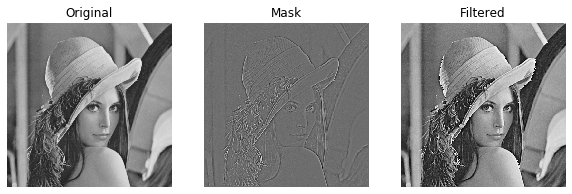

In [58]:
mask_lena = unsharpe_masking(lena, rect_avg_lena, scaled = False)

### High Boost

-123.0 ,  411.0
-360.0 ,  732.0
-755.0 ,  1267.0


<Figure size 432x288 with 0 Axes>

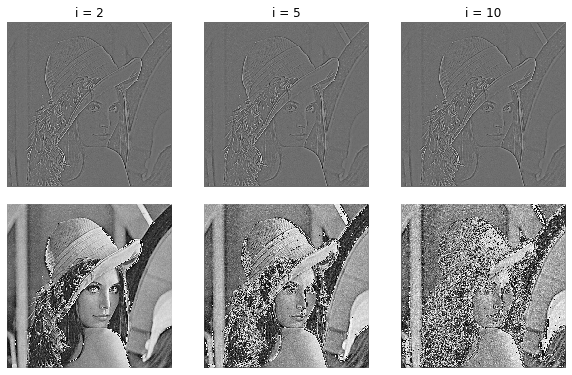

In [53]:
boost_lena = high_boost(lena, rect_avg_lena, scaled = False)

## 2.f - Scaled Images

### Unsharpe Masking

<Figure size 432x288 with 0 Axes>

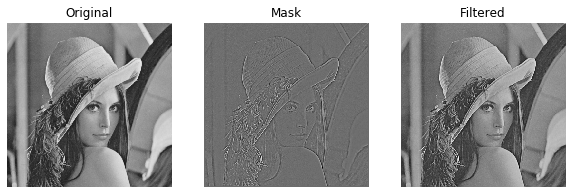

In [60]:
scaled_mask_lena = unsharpe_masking(lena, rect_avg_lena, scaled = True)

### High Boost

-123.0 ,  411.0
-360.0 ,  732.0
-755.0 ,  1267.0


<Figure size 432x288 with 0 Axes>

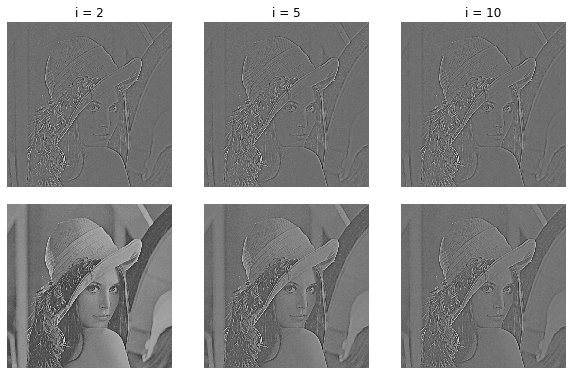

In [55]:
scaled_boost_lena = high_boost(lena, rect_avg_lena, scaled = True)

## 2. g - Discussion of the results

Looking to the images generated with and without the scalling process, we can see some important characteristics and differences:

1. The Scaled images are with a lot of gray level;
2. In the images which we don't scaled the more we increase the multiplicative factor more artefacts the resulting image has;
3. If we remove values out of the uint8 range (greater than the maximum - 255 or least than the minimum - 0), these artefacts become to be so much smaller, increasing the quality of the image. It happens because `np.ndarray.astype()` make a different proccess with values out of the specified type range (in this case our interval of values is between `0` and `2**8 - 1 = 255`, with a total of 256 values). 

**E.g.:** If we have a pixel with `pixel = -30`  and use something like `new_pixel = pixel.astype(np.uint8)`, the result will be calculated as `256 - 30 = 226`. Similarly, if we have `pixel = 400`, the result will be `400 - 256 = 144`.

### Removing out of range values from unscaled images

<Figure size 432x288 with 0 Axes>

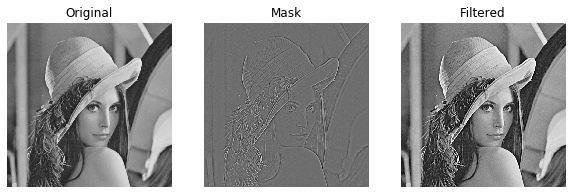

In [63]:
cutted_mask_lena = unsharpe_masking(lena, rect_avg_lena, scaled = False, cut_out = True)

-123.0 ,  411.0
-360.0 ,  732.0
-755.0 ,  1267.0


<Figure size 432x288 with 0 Axes>

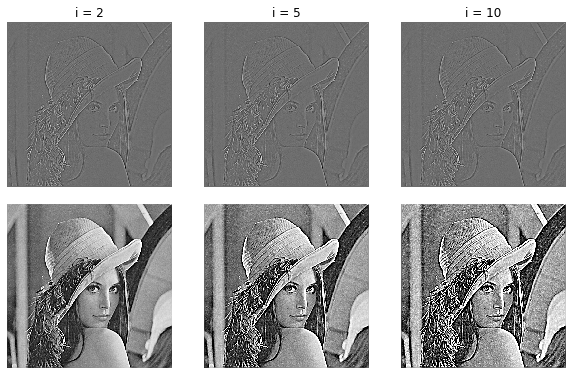

In [64]:
cutted_boost_lena = high_boost(lena, rect_avg_lena, scaled = False, cut_out = True)

In [32]:
x = np.array([0, 17, -30, 400, 50, 2, 361])
x.astype(np.uint8)

array([  0,  17, 226, 144,  50,   2, 105], dtype=uint8)